In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# gpus = tensorflow.config.list_physical_devices("GPU")
# print(gpus)

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5456809411573845270
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1432774247
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13937703213952583045
physical_device_desc: "device: 0, name: NVIDIA GeForce MX130, pci bus id: 0000:02:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


In [7]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

import cv2
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import random
# from zipfile import ZipFile

Segmentation Models: using `tf.keras` framework.


In [8]:
# train_img_dir_zip = "/content/drive/MyDrive/dataset/data_for_keras_aug/train_images/train_images.zip"
# archive = ZipFile(train_img_dir_zip)

# for file in archive.namelist():
#   archive.extract(file, 'train_images')

In [9]:
# train_mask_dir_zip = "/content/drive/MyDrive/dataset/data_for_keras_aug/train_masks/train_mask.zip"
# archive = ZipFile(train_mask_dir_zip)

# for file in archive.namelist():
#   archive.extract(file, 'train_masks')

In [10]:
# val_img_dir_zip = "/content/drive/MyDrive/dataset/data_for_keras_aug/val_images/val_images.zip"
# archive = ZipFile(val_img_dir_zip)

# for file in archive.namelist():
#   archive.extract(file, 'val_images')

In [11]:
# val_mask_dir_zip = "/content/drive/MyDrive/dataset/data_for_keras_aug/val_masks/val_masks.zip"
# archive = ZipFile(val_mask_dir_zip)

# for file in archive.namelist():
#   archive.extract(file, 'val_masks')

In [12]:
train_img_dir = "D:/APYTHON/dataset/landcover/data_for_keras_aug/train_images/train/"
img_list = os.listdir(train_img_dir)
print(img_list)
num_images = len(os.listdir(train_img_dir))
print(num_images)

['M-33-20-D-c-4-2patch_01.tif', 'M-33-20-D-c-4-2patch_011.tif', 'M-33-20-D-c-4-2patch_012.tif', 'M-33-20-D-c-4-2patch_02.tif', 'M-33-20-D-c-4-2patch_024.tif', 'M-33-20-D-c-4-2patch_025.tif', 'M-33-20-D-c-4-2patch_031.tif', 'M-33-20-D-c-4-2patch_032.tif', 'M-33-20-D-c-4-2patch_033.tif', 'M-33-20-D-c-4-2patch_10.tif', 'M-33-20-D-c-4-2patch_1010.tif', 'M-33-20-D-c-4-2patch_1018.tif', 'M-33-20-D-c-4-2patch_1019.tif', 'M-33-20-D-c-4-2patch_1022.tif', 'M-33-20-D-c-4-2patch_1023.tif', 'M-33-20-D-c-4-2patch_1033.tif', 'M-33-20-D-c-4-2patch_109.tif', 'M-33-20-D-c-4-2patch_11.tif', 'M-33-20-D-c-4-2patch_110.tif', 'M-33-20-D-c-4-2patch_1110.tif', 'M-33-20-D-c-4-2patch_1111.tif', 'M-33-20-D-c-4-2patch_1115.tif', 'M-33-20-D-c-4-2patch_1120.tif', 'M-33-20-D-c-4-2patch_1121.tif', 'M-33-20-D-c-4-2patch_1122.tif', 'M-33-20-D-c-4-2patch_1123.tif', 'M-33-20-D-c-4-2patch_1124.tif', 'M-33-20-D-c-4-2patch_120.tif', 'M-33-20-D-c-4-2patch_1211.tif', 'M-33-20-D-c-4-2patch_1219.tif', 'M-33-20-D-c-4-2patch_1223.

In [13]:
train_mask_dir = "D:/APYTHON/dataset/landcover/data_for_keras_aug/train_masks/train"
msk_list = os.listdir(train_mask_dir)
print(msk_list)
num_masks = len(os.listdir(train_mask_dir))
print(num_masks)

['M-33-20-D-c-4-2patch_01.tif', 'M-33-20-D-c-4-2patch_011.tif', 'M-33-20-D-c-4-2patch_012.tif', 'M-33-20-D-c-4-2patch_02.tif', 'M-33-20-D-c-4-2patch_024.tif', 'M-33-20-D-c-4-2patch_025.tif', 'M-33-20-D-c-4-2patch_031.tif', 'M-33-20-D-c-4-2patch_032.tif', 'M-33-20-D-c-4-2patch_033.tif', 'M-33-20-D-c-4-2patch_10.tif', 'M-33-20-D-c-4-2patch_1010.tif', 'M-33-20-D-c-4-2patch_1018.tif', 'M-33-20-D-c-4-2patch_1019.tif', 'M-33-20-D-c-4-2patch_1022.tif', 'M-33-20-D-c-4-2patch_1023.tif', 'M-33-20-D-c-4-2patch_1033.tif', 'M-33-20-D-c-4-2patch_109.tif', 'M-33-20-D-c-4-2patch_11.tif', 'M-33-20-D-c-4-2patch_110.tif', 'M-33-20-D-c-4-2patch_1110.tif', 'M-33-20-D-c-4-2patch_1111.tif', 'M-33-20-D-c-4-2patch_1115.tif', 'M-33-20-D-c-4-2patch_1120.tif', 'M-33-20-D-c-4-2patch_1121.tif', 'M-33-20-D-c-4-2patch_1122.tif', 'M-33-20-D-c-4-2patch_1123.tif', 'M-33-20-D-c-4-2patch_1124.tif', 'M-33-20-D-c-4-2patch_120.tif', 'M-33-20-D-c-4-2patch_1211.tif', 'M-33-20-D-c-4-2patch_1219.tif', 'M-33-20-D-c-4-2patch_1223.

Text(0.5, 1.0, 'Image')

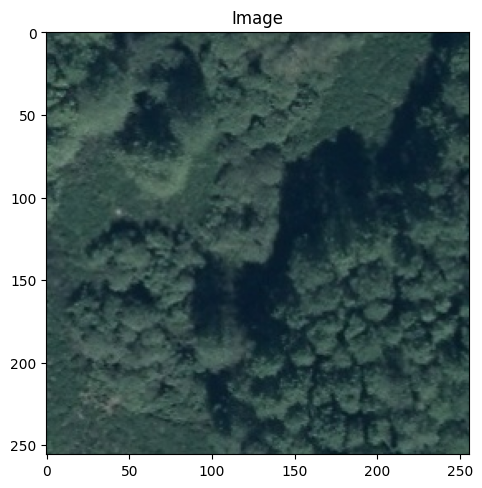

In [14]:
img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(train_img_dir+"/"+img_list[img_num], 1)
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')

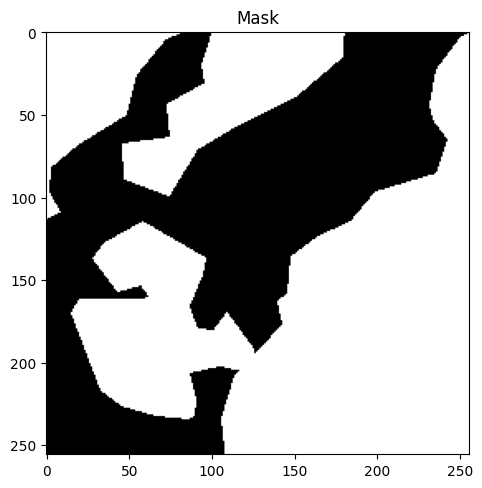

In [15]:
mask_for_plot =cv2.imread(train_mask_dir+"/"+msk_list[img_num], 0)

plt.figure(figsize=(12, 8))
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [16]:
seed= 24
batch_size= 4
n_classes= 5

import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

scaler.min_ = False

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1 import RunOptions

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

run_opts = RunOptions(report_tensor_allocations_upon_oom = True)

In [17]:
sklearn.__version__

'1.5.0'

In [18]:
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)

    return (img,mask)

In [19]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):

    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')

    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)

    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)

    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)

    train_generator = zip(image_generator, mask_generator)

    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [20]:
train_img_path = 'D:/APYTHON/dataset/landcover/data_for_keras_aug/train_images'
train_mask_path = 'D:/APYTHON/dataset/landcover/data_for_keras_aug/train_masks'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=5)

In [21]:
val_img_path = 'D:/APYTHON/dataset/landcover/data_for_keras_aug/val_images'
val_mask_path = 'D:/APYTHON/dataset/landcover/data_for_keras_aug/val_masks'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=5)

Found 16443 images belonging to 1 classes.
Found 16443 images belonging to 1 classes.


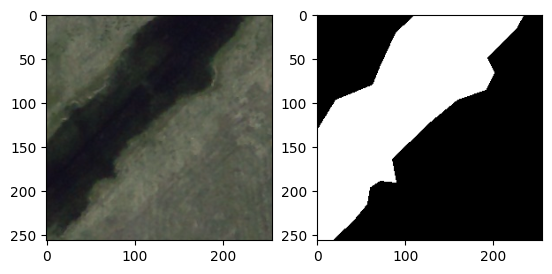

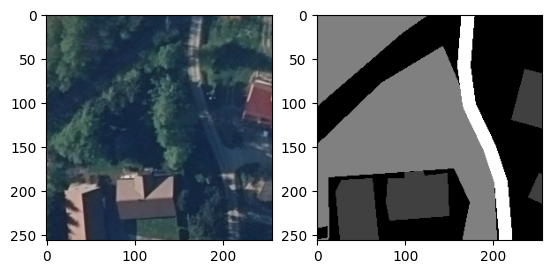

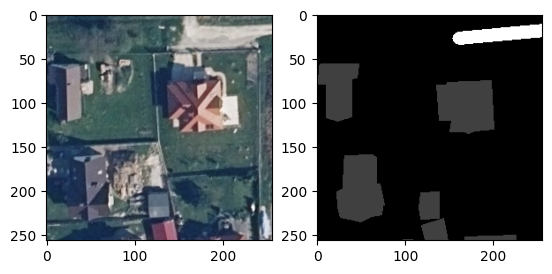

In [22]:
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

Found 5481 images belonging to 1 classes.
Found 5481 images belonging to 1 classes.


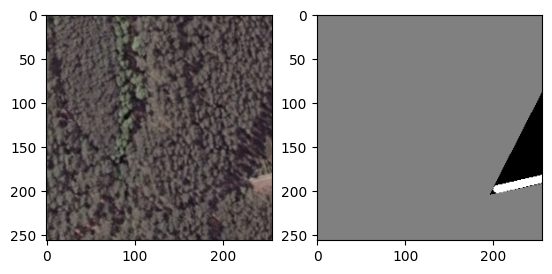

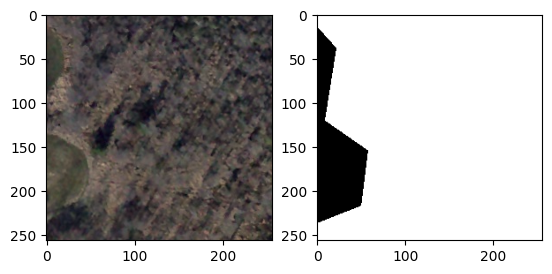

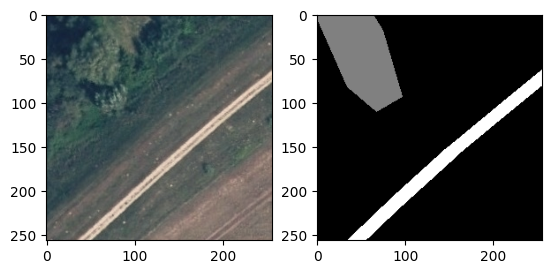

In [23]:
x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

In [24]:
num_train_imgs = len(os.listdir('D:/APYTHON/dataset/landcover/data_for_keras_aug/train_images/train/'))
num_val_images = len(os.listdir('D:/APYTHON/dataset/landcover/data_for_keras_aug/val_images/val/'))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size


IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

n_classes=5

In [25]:
#############################################################################
#Use transfer learning using pretrained encoder in the U-Net
#(make sure you uncomment the preprocess_input part in the
# preprocess_data function above)
################################################################
#Define the model
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet',
                input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                classes=n_classes, activation='softmax')
model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])

#Other losses to try: categorical_focal_dice_loss, cce_jaccard_loss, cce_dice_loss, categorical_focal_loss

In [26]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
print(model.summary())
print(model.input_shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['bn_data[0][0]']                
                                                                                                  
 conv0 (Conv2D)                 (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']   

In [27]:
#Fit the model
#history = model.fit(my_generator, validation_data=validation_datagen, steps_per_epoch=len(X_train) // 16, validation_steps=len(X_train) // 16, epochs=100)
#Train the model.
history=model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=10,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

model.save('landcover_25_epochs_RESNET_backbone_batch16.hdf5')

Epoch 1/10
4110/4110 [==============================] - 3679s 890ms/step - loss: 0.6757 - iou_score: 0.3667 - val_loss: 0.6562 - val_iou_score: 0.3874
Epoch 2/10
4110/4110 [==============================] - 3639s 885ms/step - loss: 0.5947 - iou_score: 0.4413 - val_loss: 0.6272 - val_iou_score: 0.4135
Epoch 3/10
4110/4110 [==============================] - 3781s 920ms/step - loss: 0.5714 - iou_score: 0.4616 - val_loss: 0.6204 - val_iou_score: 0.4164
Epoch 4/10
4110/4110 [==============================] - 3629s 883ms/step - loss: 0.5556 - iou_score: 0.4760 - val_loss: 0.5668 - val_iou_score: 0.4631
Epoch 5/10
4110/4110 [==============================] - 3585s 872ms/step - loss: 0.5438 - iou_score: 0.4866 - val_loss: 0.5792 - val_iou_score: 0.4515
Epoch 6/10
4110/4110 [==============================] - 3566s 868ms/step - loss: 0.5439 - iou_score: 0.4863 - val_loss: 0.5586 - val_iou_score: 0.4695
Epoch 7/10
4110/4110 [==============================] - 3582s 872ms/step - loss: 0.5270 - iou_

In [28]:
history.history

{'loss': [0.6756844520568848,
  0.5946914553642273,
  0.5714488625526428,
  0.5555778741836548,
  0.543755292892456,
  0.5438655614852905,
  0.5270147919654846,
  0.522126317024231,
  0.5154801607131958,
  0.524819016456604],
 'iou_score': [0.36671894788742065,
  0.44131287932395935,
  0.46159473061561584,
  0.4760299623012543,
  0.4865921139717102,
  0.48630332946777344,
  0.5013275146484375,
  0.505393922328949,
  0.5115521550178528,
  0.5031368136405945],
 'val_loss': [0.6562097668647766,
  0.6272247433662415,
  0.6204093098640442,
  0.5668359398841858,
  0.5792369842529297,
  0.5585742592811584,
  0.5461143851280212,
  0.5480823516845703,
  0.556742250919342,
  0.5329707264900208],
 'val_iou_score': [0.38743487000465393,
  0.41348016262054443,
  0.4164065718650818,
  0.4631456732749939,
  0.4514644742012024,
  0.4695388376712799,
  0.47997909784317017,
  0.4796903431415558,
  0.4715939164161682,
  0.4906987249851227]}

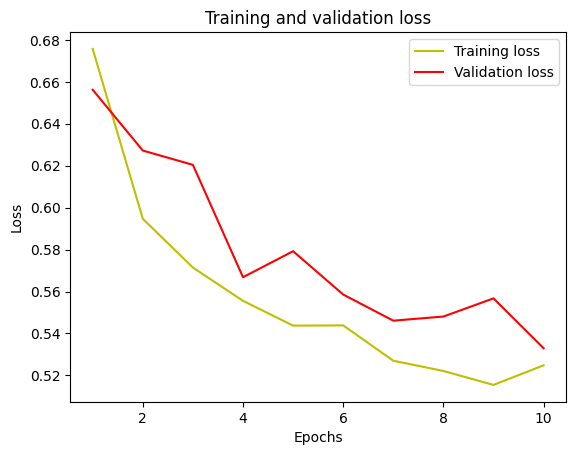

In [29]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

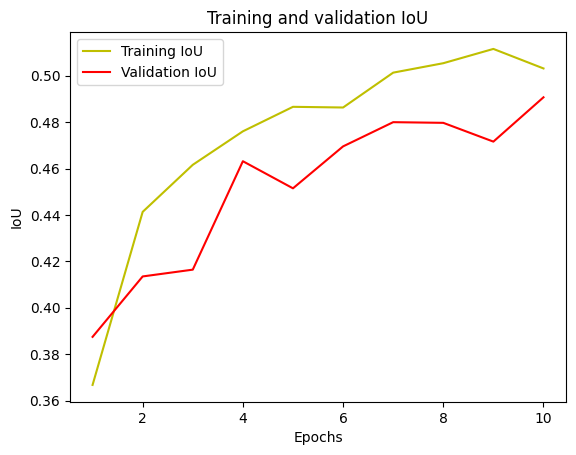

In [30]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [31]:
from keras.models import load_model

model = load_model("landcover_25_epochs_RESNET_backbone_batch16.hdf5", compile=False)

#batch_size=32 #Check IoU for a batch of images

#Test generator using validation data.

test_image_batch, test_mask_batch = val_img_gen.__next__()

#Convert categorical to integer for visualization and IoU calculation
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3)
test_pred_batch = model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=3)

n_classes = 5
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 [==============================] - 1s 1s/step
Mean IoU = 0.7534324


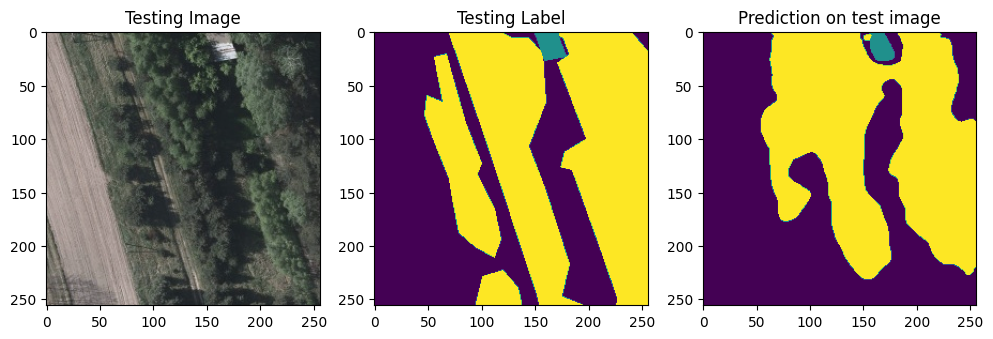

In [32]:
#View a few images, masks and corresponding predictions.
img_num = random.randint(0, test_image_batch.shape[0]-1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_image_batch[img_num])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_batch_argmax[img_num])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_pred_batch_argmax[img_num])
plt.show()